# Exploratory Data Analysis

Comes from: https://www.kaggle.com/dude431/beginner-s-visualization-and-removing-uniformative

In [1]:
import numpy as np
import os
from tqdm import tqdm
import wave
from scipy.io import wavfile
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("data/train_curated.csv")
train_noisy = pd.read_csv("data/train_noisy.csv")
test = pd.read_csv("data/sample_submission.csv")

In [3]:
print(train.shape)
print(train_noisy.shape)
print(test.shape)

(4970, 2)
(19815, 2)
(1120, 81)


## Class Distribution

We would like to understand how the classes/labels are distributed in both the curated and noisy training sets. Are there any problems with class balance that we should be aware of? We will start by looking at the labels individually below.

In [24]:
def breakLabelsApart(dataDf, structureDf):

    columns = structureDf.columns
    new_df = pd.DataFrame(data=None, columns=columns, index=dataDf.index)

    for index, row in dataDf.iterrows():
        fname = row['fname']
        allLabels = row['labels']
        splitLabels = allLabels.split(',')

        columnDict = {}
        for i in columns:
            columnDict[i] = 0

        columnDict['fname'] = fname
        for label in splitLabels:
            columnDict[label] = 1

        new_df = new_df.append(columnDict, ignore_index=True)
    
    return new_df

In [26]:
%time train_one_hot = breakLabelsApart(train, test)

CPU times: user 2min 14s, sys: 18.5 s, total: 2min 32s
Wall time: 2min 32s


In [27]:
%time train_noisy_one_hot = breakLabelsApart(train_noisy, test)

CPU times: user 28min 58s, sys: 5min 6s, total: 34min 5s
Wall time: 34min 7s


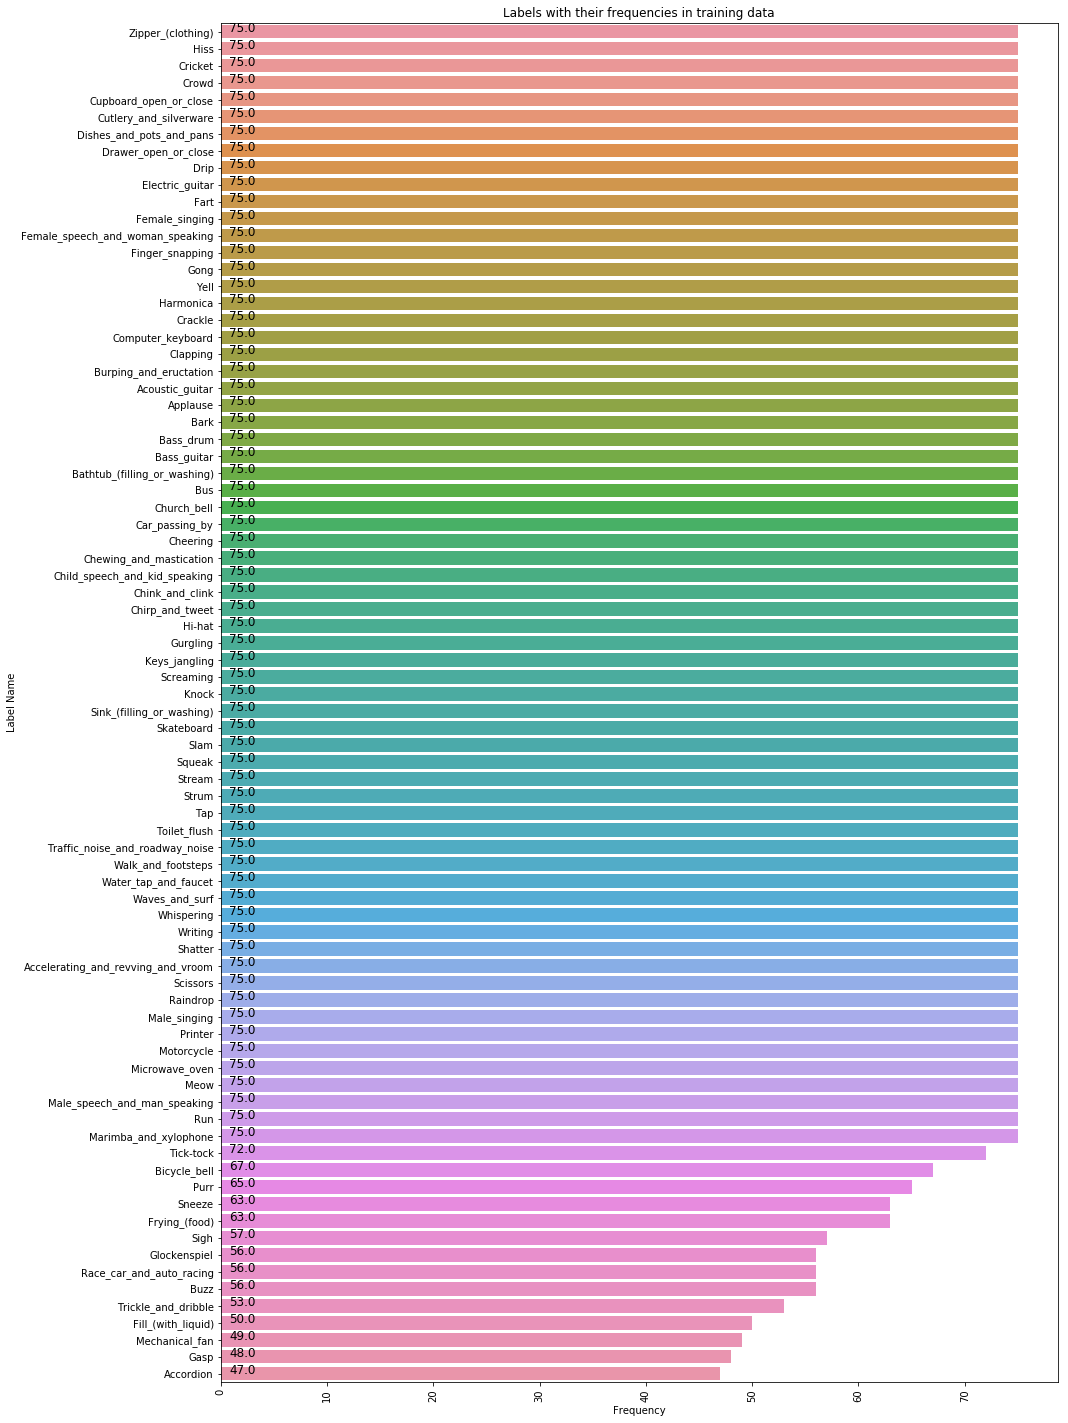

In [28]:
plt.figure(figsize=(15,25))
audio_type = train_one_hot.loc[:, 'Accelerating_and_revving_and_vroom':'Zipper_(clothing)'].sum(axis = 0).sort_values(ascending=False)
sns.barplot(audio_type.values, audio_type.index)
for i, v in enumerate(audio_type.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xticks(rotation='vertical')
plt.xlabel('Frequency')
plt.ylabel('Label Name')
plt.title("Labels with their frequencies in training data")
plt.show()

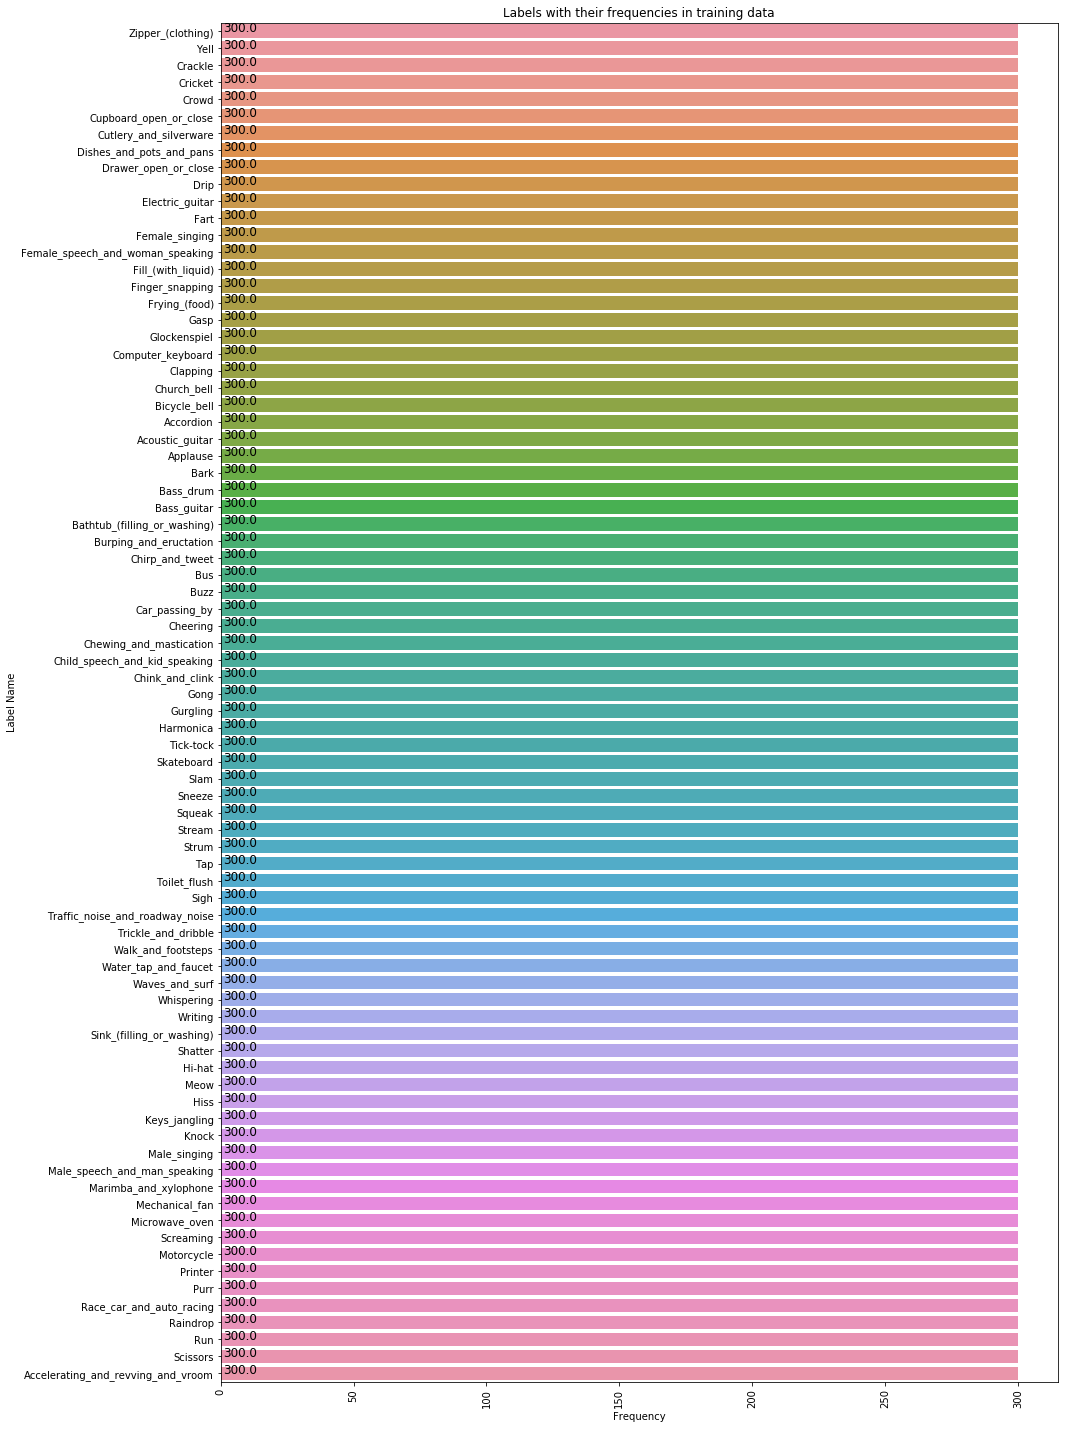

In [29]:
plt.figure(figsize=(15,25))
audio_type = train_noisy_one_hot.loc[:, 'Accelerating_and_revving_and_vroom':'Zipper_(clothing)'].sum(axis = 0).sort_values(ascending=False)
sns.barplot(audio_type.values, audio_type.index)
for i, v in enumerate(audio_type.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xticks(rotation='vertical')
plt.xlabel('Frequency')
plt.ylabel('Label Name')
plt.title("Labels with their frequencies in training data")
plt.show()

Some audio samples contain multiple noise sources. We can look at the distribution for the combination of these sources as well.

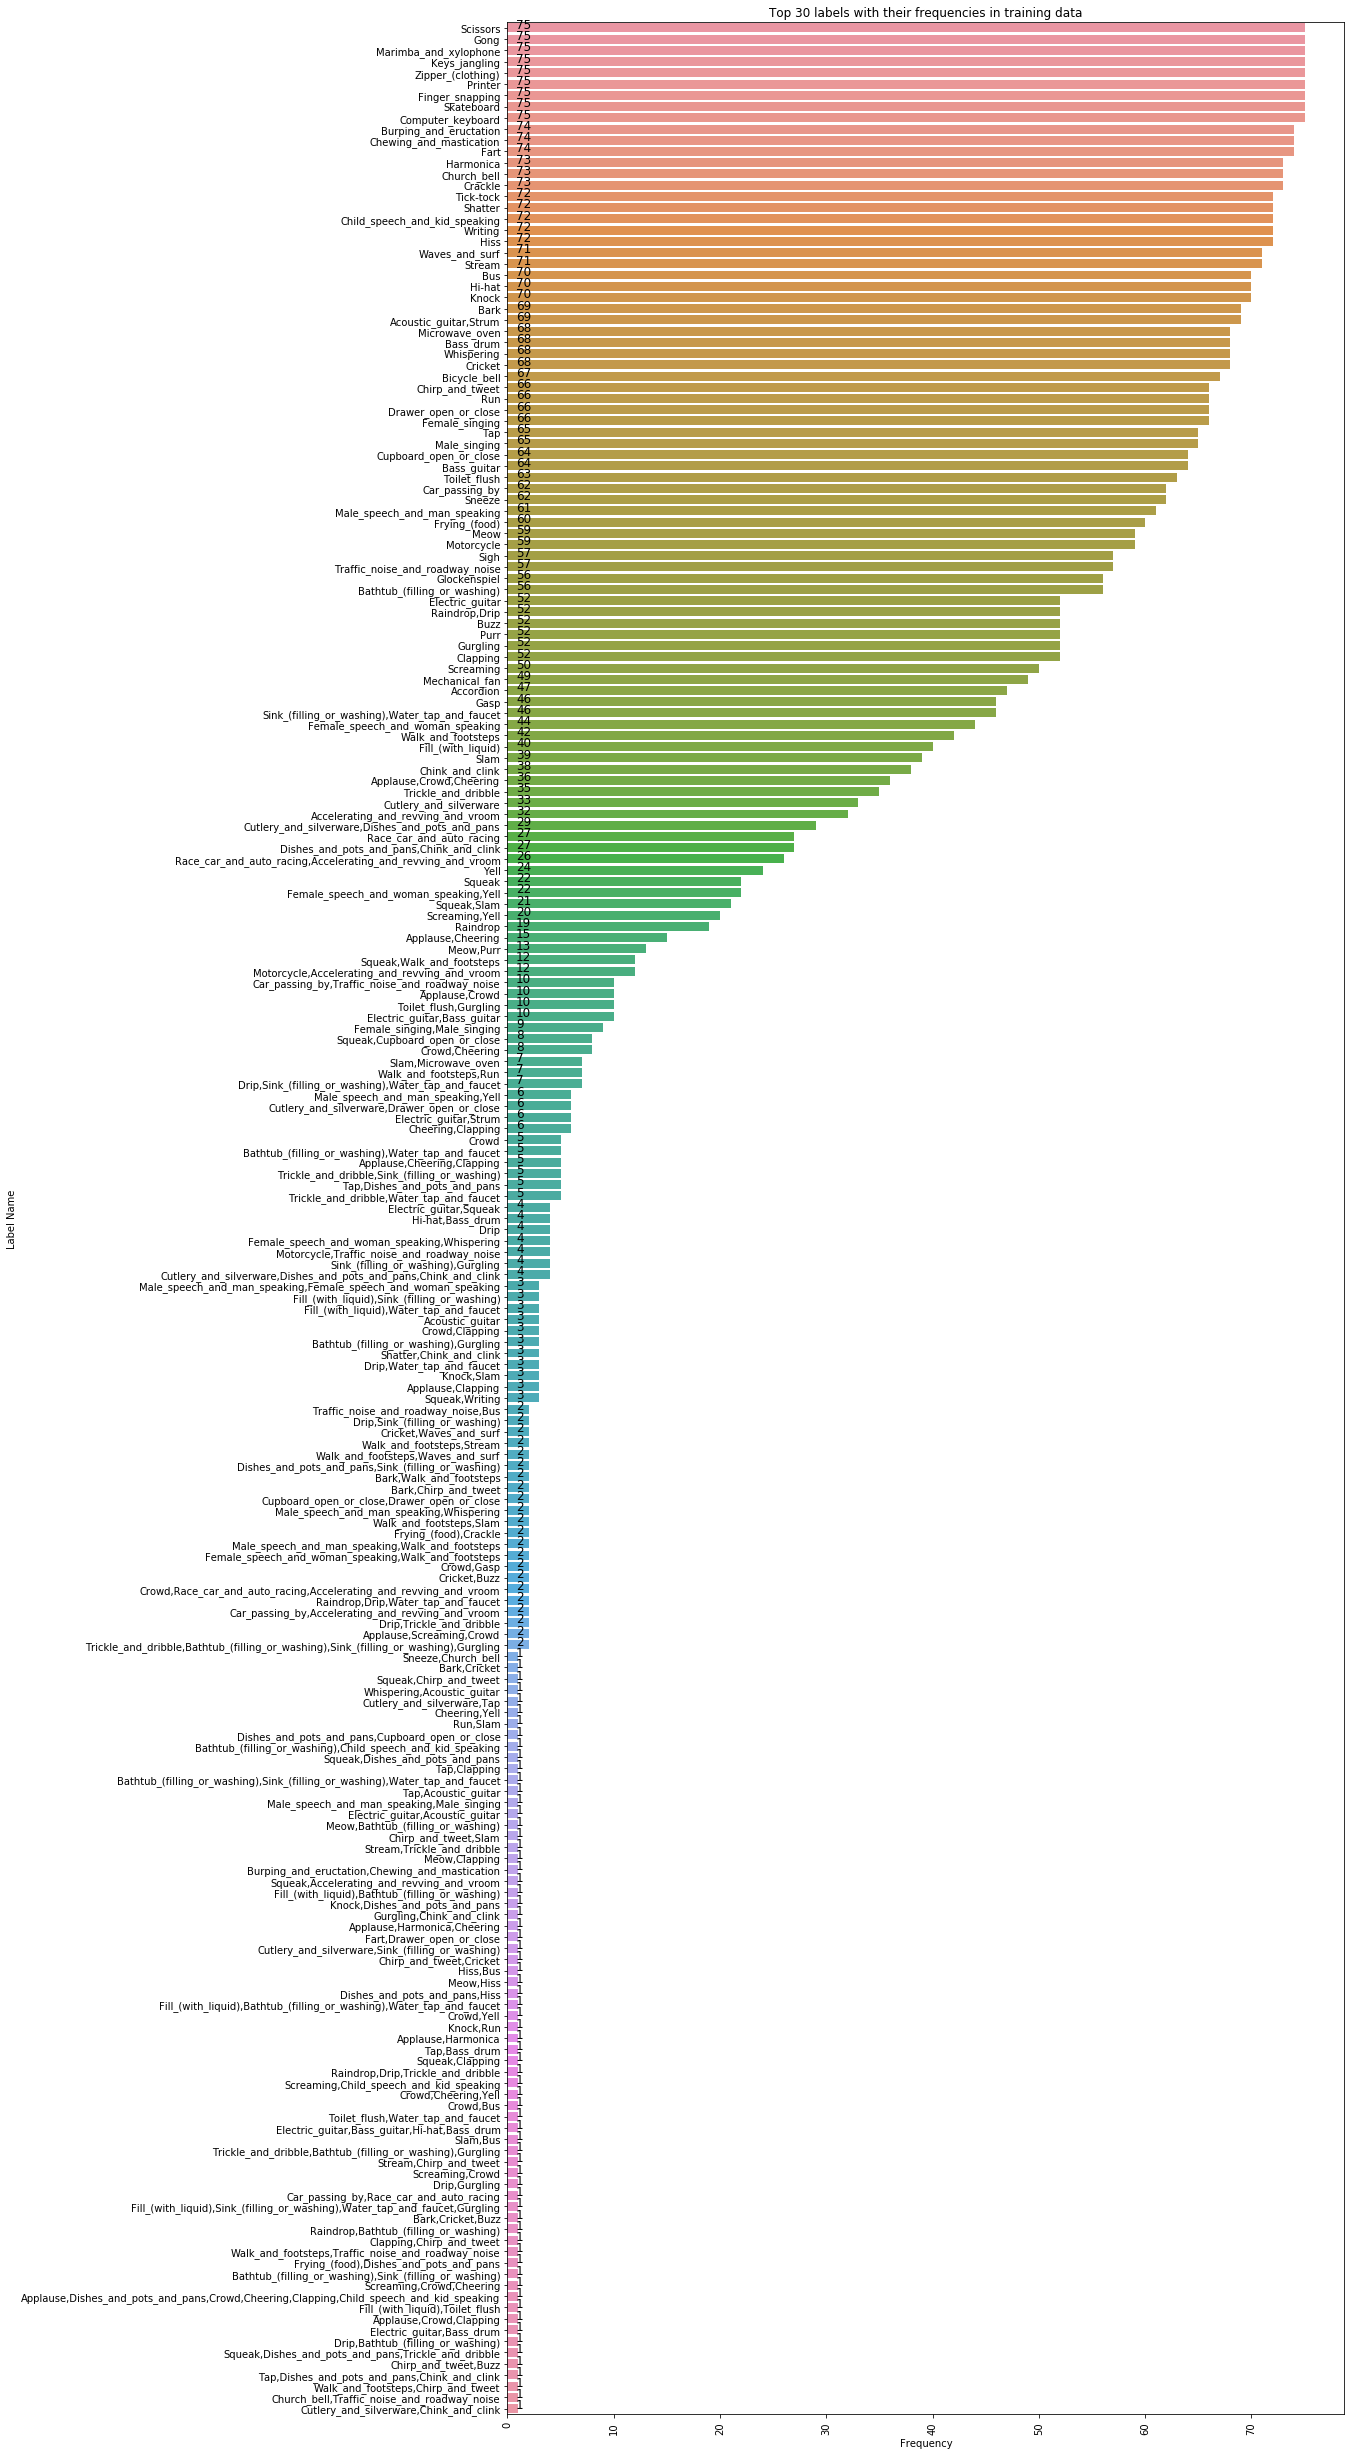

In [30]:
plt.figure(figsize=(15,44))
audio_type = train['labels'].value_counts()
sns.barplot(audio_type.values, audio_type.index)
for i, v in enumerate(audio_type.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xticks(rotation='vertical')
plt.xlabel('Frequency')
plt.ylabel('Label Name')
plt.title("Top 30 labels with their frequencies in training data")
plt.show()

## Audio Length

In [37]:
train_new = train.sort_values('labels').reset_index()
train_new['nframes'] = train_new['fname'].apply(lambda f: wave.open('data/train_curated/' + f).getnframes())

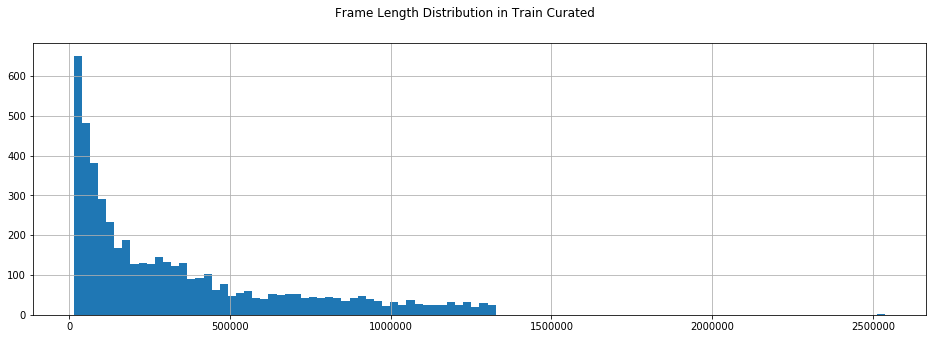

In [38]:
path = "data/train_curated/"
fig, axes = plt.subplots(figsize=(16,5))
train_new.nframes.hist(bins=100)
plt.suptitle('Frame Length Distribution in Train Curated', ha='center', fontsize='large');

There seems to be some outlier at ~2,500,000. Let's find out what it is.

In [40]:
train_new[train_new.nframes > 1500000]

index         fname  labels  nframes
4240   2316  77b925c2.wav  Stream  2538889

In [48]:
import IPython.display as ipd
ipd.Audio('data/train_curated/' + "77b925c2.wav")

This is labelled as "Stream" but is obviously not a stream, so let's remove it.

In [ ]:
os.remove('data/train_curated/77b925c2.wav')

In [55]:
train[train['fname'] == '77b925c2.wav']

fname  labels
2316  77b925c2.wav  Stream

In [57]:
train = train.drop([2316])

In [58]:
train.to_csv('data/train_clean.csv')